In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

### Practica N◦ 6: Interpolacion y cuadrados mınimos

### Ejercicio 1: Método de Horner



Dado un polinomio $p(x) = a_nx^n + a_{n-1}x^{n-1} + \dots + a_1x + a_0$, ¿cuántos productos y cuántas sumas se realizan al evaluar el polinomio en un cierto $x_0$?




Horner propone como alternativa escribir $p$ en la forma:
$$
p(x) = a_0 + x(a_1 + x(a_2 + \dots + x(a_{n-1} + x \cdot a_n) \dots))
$$


Al evaluar el polinomio en esta nueva forma, cada término se calcula utilizando una única multiplicación y una suma, lo cual reduce significativamente el número de operaciones.

La evaluación usando la forma monomial del polinomio de grado-n requiere al menos $n$ sumas y $\frac{n^2+n}{2}$ multiplicaciones, si las potencias se calculan mediante la repetición de multiplicaciones. El algoritmo de Horner sólo requiere $n$ sumas y $n$ multiplicaciones. (Minimizar el número de multiplicaciones es lo más deseable porque necesitan mucha carga computacional y son inestables comparadas con la suma).

GPT: Este método es más eficiente que la evaluación directa del polinomio y justifica el uso de una notación especial para evaluar polinomios en librerías como Numpy (y en otros lenguajes de programación). En Python, por ejemplo, en lugar de usar la notación tradicional de funciones como `f = lambda x: ...`, se emplean métodos específicos de evaluación de polinomios que implementan el método de Horner. 


### Ejercicio 2



Sea una matriz $ A \in \mathbb{R}^{m \times n} $, $ m \geq n $, cuya descomposición en valores singulares reducida es $ A = \hat{U} \hat{\Sigma} \hat{V}^t $ y la pseudo-inversa de $ A $ es $ A^{\dagger} = \hat{V} \hat{\Sigma}^{-1} \hat{U}^t $. Suponiendo que $ A $ tiene rango $ n $, probar que $ \hat{x} = A^{\dagger} b $ es la única solución del problema de cuadrados mínimos, o sea, mostrar que:

$$
\hat{x} = \min_{x \in \mathbb{R}^n} \|Ax - b\|_2
$$


**Demostración:**

Dado un vector $ b \in \mathbb{R}^m $, buscamos minimizar  $ \|Ax - b\|_2^2 $, donde $ A \in \mathbb{R}^{m \times n} $ y $ x \in \mathbb{R}^n $.
Expresamos la función $f$:
   $$ 
   f(x) = \|Ax - b\|_2^2 = (Ax - b)^T (Ax - b) 
   $$
   Expandiendo esta expresión, tenemos:
   $$ 
   f(x) = x^T A^T A x - 2b^T A x + b^T b 
   $$

Para encontrar el mínimo, derivamos $ f(x) $ con respecto a $ x $ y igualamos a cero:
   $$ 
   \nabla f(x) = 2A^T A x - 2A^T b = 0 
   $$
   Simplificando, obtenemos la ecuación normal:
   $$ 
   A^T A x = A^T b 
   $$

Como $ A $ tiene rango $ n $, el sistema $ A^T A x = A^T b $ tiene una solución única. Esto implica que el problema de mínimos cuadrados tiene una única solución $ x = (A^T A)^{-1} A^T b $.

Ahora, utilizando la pseudo-inversa:
   $$ 
   \hat{x} = A^{\dagger} b = \hat{V} \hat{\Sigma}^{-1} \hat{U}^T b 
   $$
   dado que la pseudo-inversa está definida como:
   $$ 
   A^{\dagger} = \hat{V} \hat{\Sigma}^{-1} \hat{U}^T 
   $$

Por lo tanto, $ \hat{x} $ es la única solución que minimiza $ \|Ax - b\|_2 $:
   $$
   \hat{x} = \min_{x \in \mathbb{R}^n} \|Ax - b\|_2
   $$

Esto prueba que $ \hat{x} = A^{\dagger} b $ es la única solución del problema de cuadrados mínimos.


### Ejercicio 3



Para cada uno de los conjuntos de datos, plantear las ecuaciones normales y calcular los polinomios de grado 1, 2 y 3 que mejor aproximan la tabla en el sentido de cuadrados mínimos. Graficar los datos junto con los tres polinomios. ¿Qué se observa? ¿Qué se puede decir del polinomio de grado 3?

Conjuntos de datos:

Conjunto 1:
| x  | -1 | 0 | 2 | 3  |
|----|----|---|---|----|
| y  | -1 | 3 | 11| 27 |


Conjunto 2:

| x  | -1 | 0 | 1 | 2  |
|----|----|---|---|----|
| y  | -3 | 1 | 1| 3 |




Hagamos una funcion que ingrese la lista de datos separada en variable dependiente, independiente, y el grado del polinomio al cual queremos aproximar:

In [3]:
def aproximacionPolinomial(x, y, n: int):
    # n es grado del interpolador deseado
    # X^t X b = X^t y
    # Ab = Y
    
    # Los grados que vamos a graficar
    grados = range(1,n+1)
    
    # Creamos la grilla
    x_plot = np.linspace(min(x), max(x), 100)
    
    # Ploteamos los puntos
    plt.scatter(x,y, color='red')
    
    # Creamos el polinomio interpolador de grado n en cada iteracion
    for grado in grados:
        # Ajustamos el polinomio
        coeficientes = np.polyfit(x, y, grado)
        p = np.poly1d(coeficientes)
        
        # Ploteamos el polinomio de grado n
        plt.plot(x_plot, p(x_plot), label=f'Polinomio de grado {grado}')
        
    plt.legend()
    plt.title('Ajuste de Polinomios')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

Veamos como se ve la primer tabla de datos.

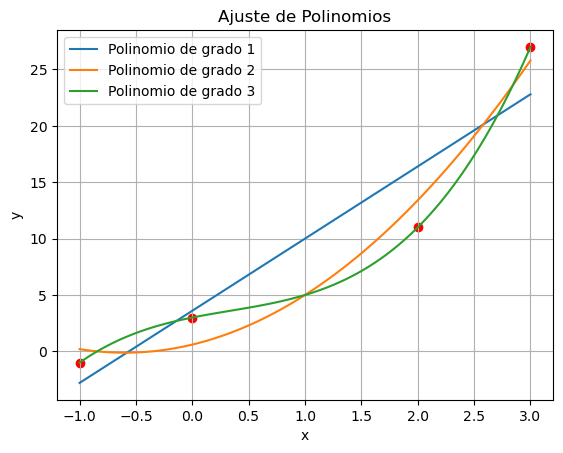

In [4]:
x = np.array([-1,0,2,3])
y = np.array([-1,3,11,27])
aproximacionPolinomial(x, y, 3)

Let's go with the second one:

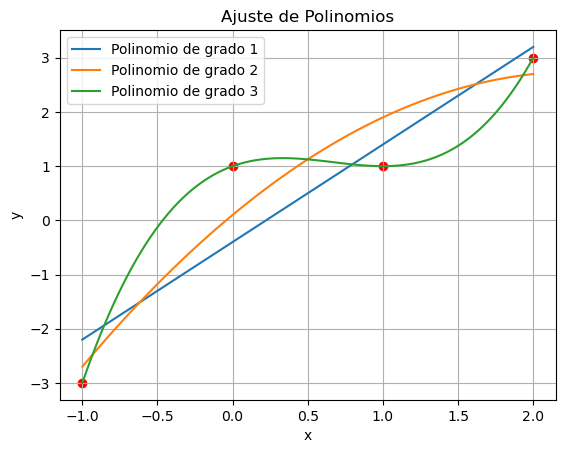

In [5]:
x = np.array([-1,0,1,2])
y = np.array([-3,1,1,3])
aproximacionPolinomial(x, y, 3)

Claramente cumple con el teorema que nos dio el Javo en clase, que es que si tengo un polinomio interpolador $p$ de grado $n-1$, donde $n$ es la cantidad de puntos con la que estamos trabajando, entonces este polinomio es unico y conecta todos los puntos. Esto se debe a que la matriz de ajuste es cuadrada ($A$). El problema con grados mayores y con mayor cantidad de datos es que podria presentar sobreajuste en funcion de la distribucion de los datos.

### Ejercicio 4



Hallar la constante $c$ (polinomio de grado 0) que mejor aproxima en el sentido de cuadrados mínimos a una función $ f : [a,b] → \mathbb{R}$ en $n$ puntos $x_1,...,x_n$ en $[a,b]$.

La constante $c$ que buscamos minimiza la función de costo $J(c)$, que se define como:

$$
J(c) = \sum_{i=1}^{n} (f(x_i) - c)^2
$$

Para encontrar el valor de $c$ que minimiza $J(c)$, derivamos $J(c)$ con respecto a $c$ y igualamos a cero:

$$
\nabla J(c) = -2 \sum_{i=1}^{n} (f(x_i) - c) = 0
$$

Simplificando la derivada obtenida, tenemos:

$$
\sum_{i=1}^{n} f(x_i) - nc = 0   
$$
$$
nc = \sum_{i=1}^{n} f(x_i)
$$
$$
c = \frac{1}{n} \sum_{i=1}^{n} f(x_i)
$$

El valor de $c$ que minimiza la suma de los cuadrados de las diferencias entre $f(x_i)$ y $c$ es la media aritmética de los valores de la función $f$ en los puntos $x_1, \ldots, x_n$. Por lo tanto, la constante que mejor aproxima $f$ en el sentido de cuadrados mínimos es:

$$
c = \frac{1}{n} \sum_{i=1}^{n} f(x_i)
$$

En criollo, demostramos que el mejor ajuste constante es simplemente la media de los valores. Wonderful.


### Ejercicio 5



Los siguientes datos corresponden a la población argentina (expresada en millones de habitantes):

| Año   | 1950 | 1960 | 1970 | 1980 | 1990 | 2000 |
|-------|------|------|------|------|------|------|
| Hab. (millones) | 17   | 20.5 | 23.9 | 27.9 | 32.6 | 36.9 |



#### (a) Ajuste Lineal
Utilizando `np.polyfit`, hallar una función $f$ de la forma $f(x) = ax + b$ que mejor ajuste los datos en el sentido de mínimos cuadrados. Graficar en una misma figura los datos y la función $f$.


Resolvamos el inciso (a). esto es identico a lo que hicimos mas arriba asi que vamos a usar la misma funcion pero vamos a usar solo la de grado 1:

In [6]:
años = np.array([1950, 1960, 1970, 1980, 1990, 2000])
poblacion = np.array([17, 20.5, 23.9, 27.9, 32.6, 36.9])


In [7]:
def aproximacionPolinomialUnica(x, y, n: int):
    # n es grado del interpolador deseado
    # X^t X b = X^t y
    # Ab = Y
    
    # Los grados que vamos a graficar
    
    # Creamos la grilla
    x_plot = np.linspace(min(x), max(x), 100)
    
    # Ploteamos los puntos
    plt.scatter(x,y, color='red')
    
    # Ajustamos el polinomio
    coeficientes = np.polyfit(x, y, n)
    p = np.poly1d(coeficientes)
        
    # Ploteamos el polinomio de grado n
    plt.plot(x_plot, p(x_plot), label=f'Polinomio de grado {n}')
        
    plt.legend()
    plt.title('Poblacion de la Republica Argentina')
    plt.xlabel('Año')
    plt.ylabel('Poblacion (millones de habitantes)')
    plt.grid()
    plt.show()
    return p


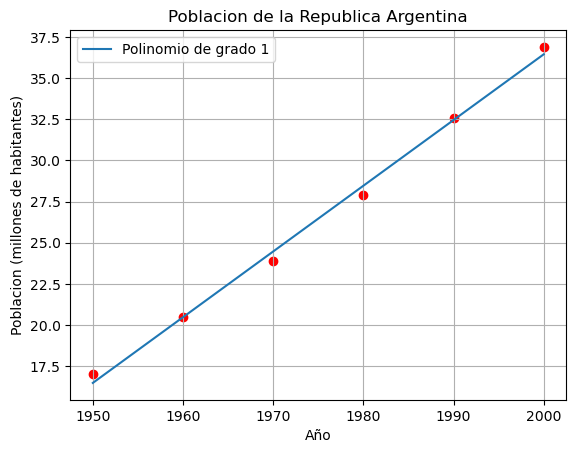

poly1d([ 3.99428571e-01, -7.62404762e+02])

In [8]:
p = aproximacionPolinomialUnica(años,poblacion,1)
p


#### (b) Inferencia de Población
Utilizando la función del ítem anterior, ¿qué población se puede inferir que había en Argentina en los años 1955, 1965, 1975, 1985 y 1995?


Bueno, esta claro que tiene una tendencia lineal a incrementar con los año, e inclusive no parece haber tanto error con el ajuste. Veamos ahora el inciso (b):

In [9]:
años_inferidos = np.array([1955, 1965, 1975, 1985, 1995])
poblacion_estimada = p(años_inferidos)

Nuestro polinomio interpolador nos dice que las poblaciones esperadas para esos años es de $ 18.47809524, 22.47238095, 26.46666667, 30.46095238, 34.4552381 , 38.44952381$ 
respectivamente. No se entiende mucho asi, asi que vamos a seguir los pasos del inciso (c). Calculemos el error que se comedio al calcular las poblaciones con los datos reales que son 
| Año   | 1955 | 1965 | 1975 | 1985 | 1995 | 
|-------|------|------|------|------|------|
| Hab. (millones) | 18.8  | 22.5 | 25.9 | 30.2 | 34.8 |        




#### (c) Cálculo del Error
La población real de la Argentina en los años del ítem anterior era de 18.8, 22.2, 25.9, 30.2 y 34.8 millones de habitantes respectivamente. Calcular el error que se cometió al inferir la población de estos años a partir del ajuste del ítem (a). Volver a graficar la función $f$ del ítem (a), incorporando (en otro color) los nuevos datos.


In [10]:
# Creamos un array con la poblacion exacta 
poblacion_exacta = np.array([18.8, 22.5, 25.9, 30.2, 34.8])
# Nos creamos un array para guardar los errores
errores = np.zeros(5)

# Iteramos sobre cada año y guardamos el error cometido en el array vectores
for i in range(5):
    errores[i] = poblacion_exacta[i] - poblacion_estimada[i]

Bueno, ahora veamos cuanto nos quedo de error:

In [11]:
errores = abs(errores)
print(errores)

[0.32190476 0.02761905 0.56666667 0.26095238 0.3447619 ]


Bastante mal, considerando que le erramos por 0.5 millones de habitantes en el peor caso. Grafiquemos de vuelta la funcion $f$ del inciso (a) pero con los puntos de la poblacion exacta con los errores estimados con barras de error:

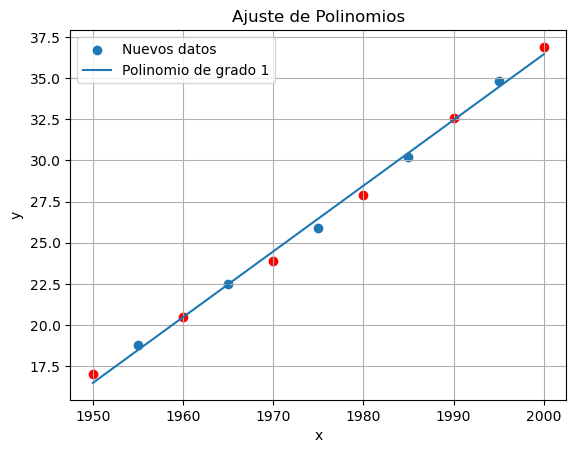

In [12]:
plt.scatter(años_inferidos, poblacion_exacta, label='Nuevos datos')
aproximacionPolinomial(años, poblacion,1)

Me cabio, el error calculado no esta tan mal, veamos ahora cuanto es el porcentaje relativo de error por cada punto:

In [13]:
error_relativo = abs(poblacion_exacta - poblacion_estimada) / abs(poblacion_exacta)
error_relativo_porcentaje = error_relativo * 100 

for i in range(5):
    print(años_inferidos[i])
    print(f"Error relativo: {error_relativo[i]: .5f}")
    print(f"Porcentaje de error relativo: {error_relativo_porcentaje[i]: .5f} %\n")

1955
Error relativo:  0.01712
Porcentaje de error relativo:  1.71226 %

1965
Error relativo:  0.00123
Porcentaje de error relativo:  0.12275 %

1975
Error relativo:  0.02188
Porcentaje de error relativo:  2.18790 %

1985
Error relativo:  0.00864
Porcentaje de error relativo:  0.86408 %

1995
Error relativo:  0.00991
Porcentaje de error relativo:  0.99070 %




#### (d) Evaluación de la Inferencia
¿Considera que la inferencia del ítem (b) es razonablemente buena?


No esta para nada mal, pero por ejemplo en 1955 y en 1975 tenemos un error de la magnitud de $1/50$, que no esta tan bien para ser una interpolacion. El resto se mantiene bien, debajo de la centesima de error.

### Ejercicio 6



Supongamos que se tienen puntos $x_0, x_1, \dots, x_n$ distintos, y se quiere hallar el polinomio $p$ de grado a lo sumo $n$ de modo que $p(x_i) = y_i$ (es decir, $p$ interpola los puntos $(x_i, y_i)$).  Plantear la matriz del problema (matriz de Vandermonde) ¿Que tamaño tiene? Observar que $p$ se puede ver como un caso particular de aproximacion en el sentido de cuadrados minimos.



La matriz de Vandermonde asociada a los puntos $x_0, x_1, \dots, x_n$ es:

   $$
   V = 
   \begin{bmatrix}
   1 & x_0 & x_0^2 & \dots & x_0^n \\
   1 & x_1 & x_1^2 & \dots & x_1^n \\
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_n & x_n^2 & \dots & x_n^n \\
   \end{bmatrix}
   $$
La matriz $V$ tiene tamaño $(n+1) \times (n+1)$.

### Ejercicio 7



Interpolar la siguiente función en $n + 1$ puntos equiespaciados en el intervalo $[−1,1]$. $$f(x) = \frac{1}{1 +25x^2}$$ Graficar simultáneamente la función con sus respectivos interpoladores $p_n$ para $n = 5,10,15$. Para valores altos de $n$ ¿mejora o empeora la aproximación? Calcular la norma infinito de $(f − p_n)$.

Solucion: 

En clase vimos que esta función tiene un comportamiento llamado [**Fenomeno de Runge**](https://es.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge), ya que el Carl Runge quien descubio que si se intepola esta función utilizando nodos equidistantes $x_i$ entre -1 y 1, la interpolacion con un polinomio resulta oscilante hacia los extremos del intervalo. Es decir, cerca de -1 y 1. Incluso se puede probar que el error de interpolacion, o bien la norma infinito, tiende a infinito cuando crece el grado del polinomio. En un momento calcularemos esto. 



Primero, grafiquemos la funcion $f$ como esta descrita mas arriba

In [14]:
def graficarRunge():
    x = np.linspace(-1,1,100)
    plt.plot(x, 1/(1+25*x**2), label="f")
    plt.legend()
    plt.grid()
    plt.title("Funcion de Runge")
    plt.show()

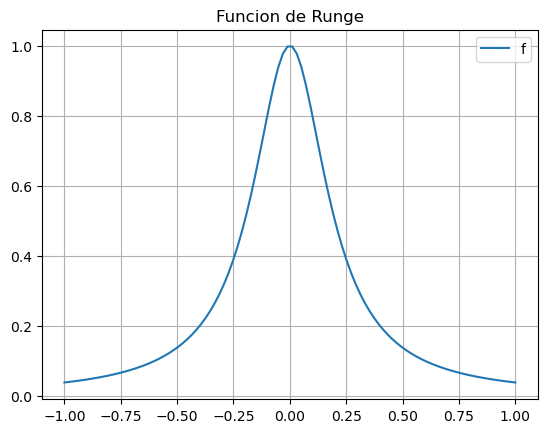

In [15]:
graficarRunge()

No tiene mucho misterio esta funcion asi nomas, es de la pinta $1/1+x^2$, o sea una distribucion normal. Agreguemosle los puntos y veamos que pasa con el polinomio interpolador.

In [23]:
def interpoladorRunge(n=15):
    # n es el grado del polinomio
    # el polinomio contara con n+1 puntos

    # los grados pedidos en el ejercicio
    grados = range(5,n+1,5)

    # Creamos la grilla
    x_plot = np.linspace(-1,1,100)
    
    # Ploteamos los puntos
    if(n == 15):
        for i in grados:    
            # Ajustamos el polinomio
            x = np.linspace(-1,1,i+1)
            coeficientes = np.polyfit(x, 1/(1+25*x**2), i)
            p = np.poly1d(coeficientes)
            
            # Ploteamos el polinomio de grado n
            plt.plot(x_plot, p(x_plot), label=f'Polinomio de grado {i}')
    else:
        # Ajustamos el polinomio
        x = np.linspace(-1,1,n+1)
        coeficientes = np.polyfit(x, 1/(1+25*x**2), n)
        p = np.poly1d(coeficientes)
        
        # Ploteamos el polinomio de grado n
        plt.plot(x_plot, p(x_plot), label=f'Polinomio de grado {n}')
        
    plt.legend()
    plt.title('Fenómeno de Runge')
    plt.grid()
    plt.show()

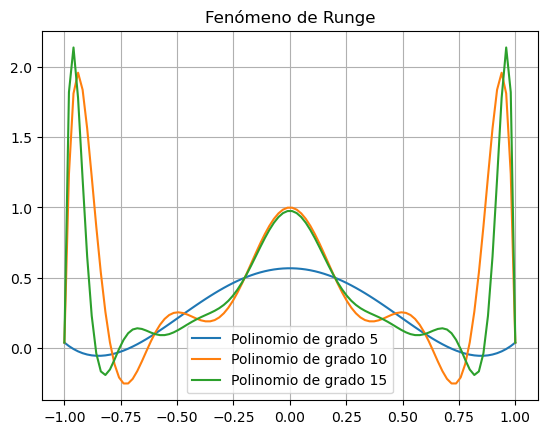

In [24]:
interpoladorRunge()

Veamos como se va a la mismisima mierda este polinomio, o sea que la norma infinito es infinito:

/tmp/ipykernel_7656/2052052063.py:1: RankWarning: Polyfit may be poorly conditioned
  interpoladorRunge(69)


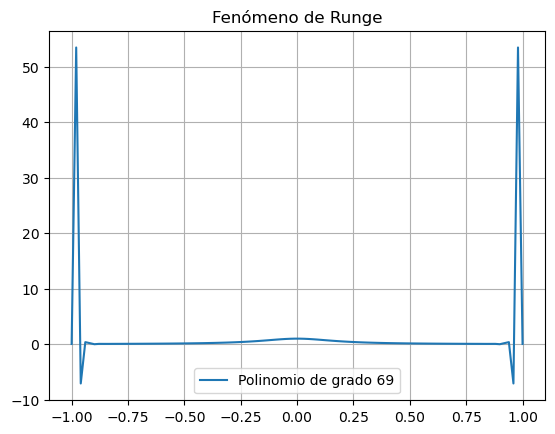

In [25]:
interpoladorRunge(69)

Haciendo un par de cuentas (son demasiadas) podemos llegar a que:
$$
\lim_{n \rightarrow \infty} \left( \max_{-1 \leq x \leq 1} |f(x) - P_n(x)| \right) = \infty.
$$
Lo cual es la norma infinito cuando $n$ tiende a $\infty$. 

La demostracion formal sale usando el **Teorema de interpolacion de Lagrange**, que propone que la diferencia entre una funcion continua $f(x)$ y su interpolante polinomio $p_n(x)$ en un punto especifico $x$ dentro e un intervalo donde se conoce la funcion en ciertos puntos $x_i$ es 
$$
f(x)−p_n(x)= \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n{x-x_i}
$$
donde $\xi$ es un punto en el intervalo entre el menor y el mayor de los nodos $x_i$.  La clave aca es el término $f^{(n+1)}(\xi)$, que representa la derivada de orden $n+1$ de la funcion $f$ en algun punto intermedio $\xi$ y la productoria $\prod_{i=0}^n{x-x_i}$ que depende dde  distancia entre $x$ y los puntos de interpolacion. 

Un poco mas claro, cuando usamos polinomios de grado alto, el error de interpolacion tiende a crecer en los extremos del intervalo, que es lo que el ejercicio quiere que veamos. En la practica este fenómeno se mitiga usando puntos de interpolación distribuidos de manera no uniforma, como los nodos de Chebyshev, que minimizan el efecto de oscilacion del polinomio en los extremos. Como fue explicado en clase, este problema se puede evitar usando curvas spline, que son polinomios por partes. O sea, que en lugar de aumentar el grado del interpolador, se aumenta la cantidad de polinomios de grado bajo.

Tiene una semejanza interesante con el fenomeno de Gibbs, presente en funciones de base senoidal y en aproximaciones finitas de series de Fourier.


### Ejercicio 8


Se quiere aproximar los datos con una función $ g $ de la forma $ g(x) = e^{p(x)} $, donde $ p $ es un polinomio. Linealizar el problema y calcular el polinomio de grado 5 que interpola los datos.

Obtener la expresión de $p(x)$ en pantalla.

¿Se observa algo llamativo en la expresión del polinomio? ¿Qué grado parece tener efectivamente el polinomio?

Repetir el ajuste utilizando $p$ de grado 1 y graficar .


Solucion: 

Primero linearizemos, o sea, apliquemos logaritmo natural a ambos lados:
$$
\ln(g(x)) = p(x)
$$

La gracia de hacer esto es pasar de un problema no lineal, a un problema lineal con el que sabemos trabajar, ya que sabemos interpolar en este formato.

Recordemos que los datos serian:


In [28]:
años = np.array([1950, 1960, 1970, 1980, 1990, 2000])
poblacion = np.array([17, 20.5, 23.9, 27.9, 32.6, 36.9])

Apliquemos el logaritmo a los datos de poblacion:

In [56]:
def interpolacionLogaritmica(n: int):
    # Calculamos el logaritmo natural a la poblacion
    log_poblacion = np.log(poblacion)

    # Calculamos los coeficientes a0, a1, ..., a5 del polinomio
    coeficientes_grado5 = np.polyfit(años, log_poblacion, n)

    # Calculamos el polinomio
    p_n = np.poly1d(coeficientes_grado5)

    # Calculamos la funcion original g(x)
    g_n = np.exp(p_n(años))
    
    
    plt.scatter(años, poblacion, label="Datos originales")
    plt.plot(años, g_n, label=f"Interpolador de grado {n}", color="orange")
    plt.xlabel("Año")
    plt.ylabel("Poblacion (millones de habitantes)")
    plt.title(f"Interpolacion de la poblacion argentina con polinomio de grado {n}")
    plt.legend()
    plt.show()
    
    return g_n

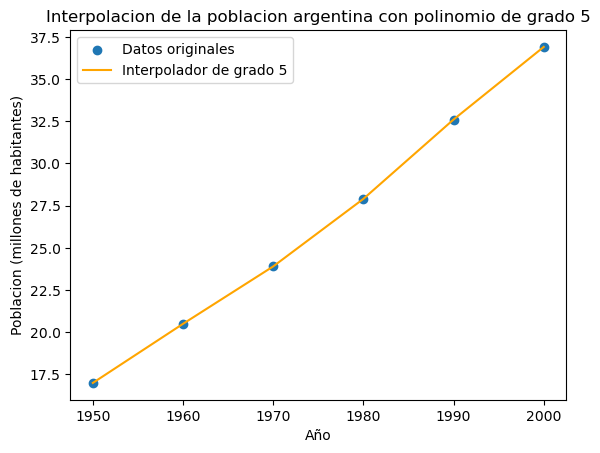

array([16.99999899, 20.49999888, 23.89999889, 27.89999854, 32.59999812,
       36.89999711])

In [57]:
interpolacionLogaritmica(5)

O sea se ve que claramente los interpola perfectamente, y es natural, ya que estamos con una matriz de vandermonde cuadrada, y como explicamos arriba, este polinomio es unico y toca todos los puntos. Veamos el de grado 1:

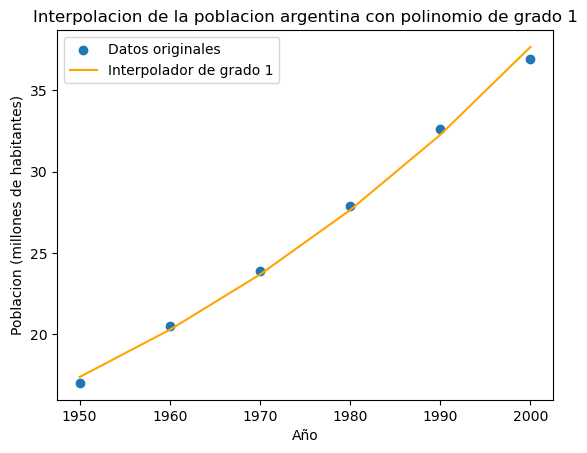

array([17.36057054, 20.26912432, 23.66497114, 27.62975105, 32.25878191,
       37.66335096])

In [58]:
interpolacionLogaritmica(1)

O sea, paso lo esperable, la funcion es una funcion exponencial normal que aun asi los aproxima bastante mejor que el polinomio calculado en el ejercicio 5. Esto se debe a que estamos trabajando con una poblacion entonces, medio que pide a gritos ser aproximada por una funcion exponencial. 

### Ejercicio 9

Supongamos que se deja caer un objeto desde una altura de 200 m. Mientras cae, se toman las siguientes mediciones:

| Tiempo (s) | 0 | 1 | 2 | 4 |
|------------|---|---|---|---|
| Altura (m) | 200 | 195 | 180 | 120 | 25 |

Se quiere aproximar los datos en el sentido de cuadrados mínimos con una función de la forma $f(t) = at^2 + b $.

(a) Escribir la matriz del problema. ¿Se puede usar el comando `np.polyfit` con grado 2 para realizar el ajuste? ¿Qué se podría hacer para usar `np.polyfit`?

(b) Sabiendo que la altura de dicho objeto después de haber transcurrido un tiempo $t$ viene dada por $ f(t) = 200 - \frac{1}{2}gt^2 $. determinar el valor aproximado de $ g $.

Solucion:

Primero nos piden escribir la matriz del problema. Asumo que me estaran pidiendo la matriz $V$ de Vandermonde. Es la siguiente

   $$
   V = 
   \begin{bmatrix}
   1 & 0 \\
   1 & 1 \\
   1 & 4 \\
   1 & 16\\
   \end{bmatrix}
   $$

Esto parece raro a simple vista, porque lo es, pero en realidad esta es la matriz que ajusta a un polinomio cuadratico sin termino lineal (grado 1) como nos pide le enunciado. Lamentablemente no podemos usar el comando `np.polyfit` ya que esto me incluiria el termino lineal. 

Una idea para aproximarlo de todas formas con el metodo de Numpy es ignorar el coeficiente lineal generado por el metodo, o sino resolverlo a mano usando `np.linalg.lstsq`

Veamos la primer forma:

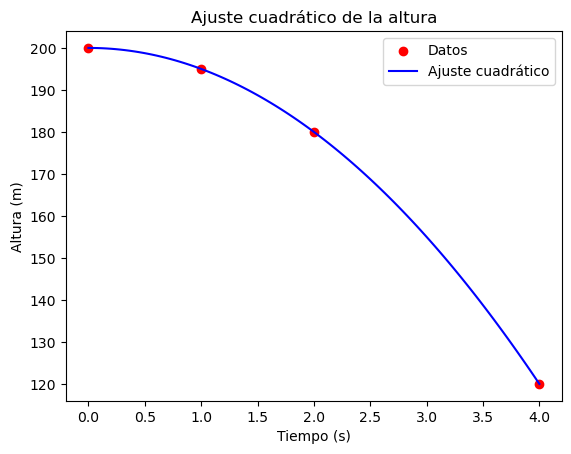

Coeficientes del polinomio: [ -5.   0. 200.]


In [66]:
# Datos
t = np.array([0, 1, 2, 4])
h = np.array([200, 195, 180, 120])

# Calculamos los coeficientes del polinomio de grado 2
coeffs = np.polyfit(t, h, 2)

# Obtenemos el polinomio interpolador
p = np.poly1d(coeffs)

# Graficar
t_fit = np.linspace(0, 4, 100)
h_fit = p(t_fit)

plt.scatter(t, h, color='red', label='Datos')
plt.plot(t_fit, h_fit, label='Ajuste cuadrático', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Ajuste cuadrático de la altura')
plt.legend()
plt.show()

# Mostramos coeficientes truncados
for i in range(len(coeffs)):
    coeffs[i] = round(coeffs[i])
print(f'Coeficientes del polinomio: {coeffs}')

Bueno, esta rara la cosa, porque se nota que el polinomio de grado 2 que aproxima a esta funcion, tiene como coeficiente lineal al 0, como se ve arriba (-9.92e-14 = 0). Asi que medio que con esto ya quedaria resuleto el ejercicio, y el polinomio $p$ de ajuste es
$$
p_2(t) = -5t^2 + 200
$$

Lo mejor de todo es que tiene sentido que esto sea un objeto cayendose, sigue la trayectoria perfectamente :thumbsup:

Vamos con el segundo inciso. Nos dicen que la altura del obejto despues de cierto tiempo $t$ viene dada por $f(t)=200-\frac{1}{2}gt^2$, y que aproximemos el valor de $g$. 

Aunque me den ganas de pegarme un corchazo decir esto, segun nuestra aproximacion, si $p_2(t) \approx f(t)$, entonces 
$$
-5t^2 + 200 \approx 200-\frac{1}{2}gt^2
$$
Por tanto,
$$
g \approx 10
$$

Sacrilegio.